**IMPORTING THE NECESSARY LIBRARY**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**IMPORTING MY CSV FILE**

In [3]:
from google.colab import files
import pandas as pd

In [4]:
uploaded = files.upload()

Saving customer_segmentation_data csv.csv to customer_segmentation_data csv.csv


In [8]:
df = pd.read_csv("customer_segmentation_data csv.csv")
df.head()

,id,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount,annual_spend,customer_lifetime_value,Segment,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,1,38,Female,"$99,342",90,3,24,Groceries,$113.53,"$2,724.72","$8,174.16",High Value,NaN,NaN,NaN,NaN,NaN
1,2,21,Female,"$78,852",60,2,42,Sports,$41.93,"$1,761.06","$3,522.12",Price Sensitive,NaN,NaN,NaN,NaN,NaN
2,3,60,Female,"$126,573",30,2,28,Clothing,$424.36,"$11,882.08","$23,764.16",Growth Potential,NaN,NaN,NaN,NaN,NaN
3,4,40,Other,"$47,099",74,9,5,Home & Garden,$991.93,"$4,959.65","$44,636.85",Price Sensitive,NaN,NaN,NaN,NaN,NaN
4,5,65,Female,"$140,621",21,3,25,Electronics,$347.08,"$8,677.00","$26,031.00",Growth Potential,NaN,NaN,NaN,NaN,NaN


**CLEANING THE DATA**

In [9]:
df = df.drop(["Unnamed: 12", "Unnamed: 13", "Unnamed: 14", "Unnamed: 15", "Unnamed: 16"], axis=1)

In [10]:
df.head()

,id,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount,annual_spend,customer_lifetime_value,Segment
0,1,38,Female,"$99,342",90,3,24,Groceries,$113.53,"$2,724.72","$8,174.16",High Value
1,2,21,Female,"$78,852",60,2,42,Sports,$41.93,"$1,761.06","$3,522.12",Price Sensitive
2,3,60,Female,"$126,573",30,2,28,Clothing,$424.36,"$11,882.08","$23,764.16",Growth Potential
3,4,40,Other,"$47,099",74,9,5,Home & Garden,$991.93,"$4,959.65","$44,636.85",Price Sensitive
4,5,65,Female,"$140,621",21,3,25,Electronics,$347.08,"$8,677.00","$26,031.00",Growth Potential


**Scatter Plot (Income vs Spending Score)**

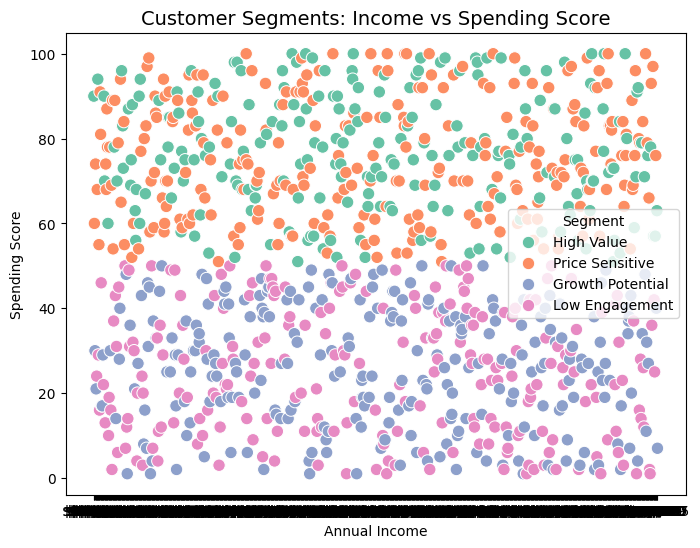

In [11]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="income", y="spending_score", hue="Segment", palette="Set2", s=80)
plt.title("Customer Segments: Income vs Spending Score", fontsize=14)
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.show()

**Bar Chart (Average Purchase Frequency by Segment)**

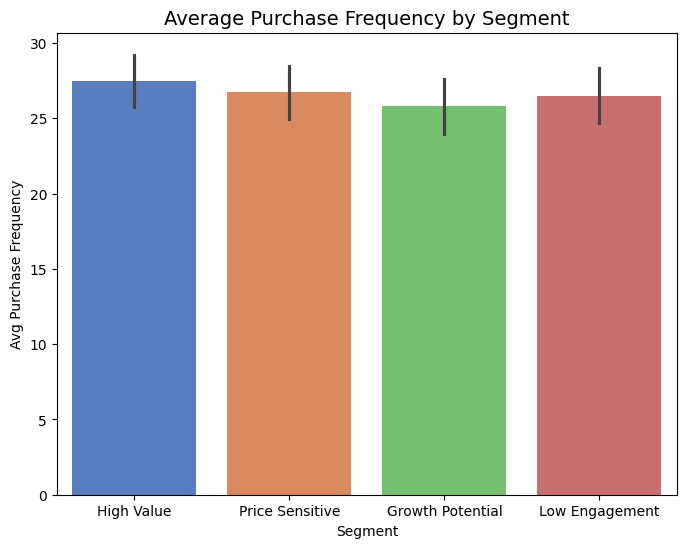

In [12]:
plt.figure(figsize=(8,6))
sns.barplot(
    data=df,
    x="Segment",
    y="purchase_frequency",
    hue="Segment",       # Explicitly add hue
    palette="muted",
    legend=False,        # Hide legend since hue == x
    estimator="mean"
)
plt.title("Average Purchase Frequency by Segment", fontsize=14)
plt.ylabel("Avg Purchase Frequency")
plt.show()


**Revenue by Preferred Category**

In [15]:
df["Annual_Spend"] = df["purchase_frequency"] * df["last_purchase_amount"]
df.head()

,id,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount,annual_spend,customer_lifetime_value,Segment,Annual_Spend,annual_Spend
0,1,38,Female,"$99,342",90,3,24,Groceries,113.53,"$2,724.72","$8,174.16",High Value,2724.72,2724.72
1,2,21,Female,"$78,852",60,2,42,Sports,41.93,"$1,761.06","$3,522.12",Price Sensitive,1761.06,1761.06
2,3,60,Female,"$126,573",30,2,28,Clothing,424.36,"$11,882.08","$23,764.16",Growth Potential,11882.08,11882.08
3,4,40,Other,"$47,099",74,9,5,Home & Garden,991.93,"$4,959.65","$44,636.85",Price Sensitive,4959.65,4959.65
4,5,65,Female,"$140,621",21,3,25,Electronics,347.08,"$8,677.00","$26,031.00",Growth Potential,8677.00,8677.00


In [26]:
# Remove $ and convert to float
df["last_purchase_amount"] = (
    df["last_purchase_amount"]
    .replace('[\$,]', '', regex=True)  # remove $ and commas
    .astype(float)
)

# Now calculate Annual Spend
df["annual_Spend"] = df["purchase_frequency"] * df["last_purchase_amount"]

<>:4: SyntaxWarning: invalid escape sequence '\$'
<>:4: SyntaxWarning: invalid escape sequence '\$'
/tmp/ipython-input-3177216114.py:4: SyntaxWarning: invalid escape sequence '\$'
  .replace('[\$,]', '', regex=True)  # remove $ and commas


In [27]:
df.head()

,id,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount,customer_lifetime_value,Segment,Annual_Spend,annual_Spend
0,1,38,Female,99342.0,90,3,24,Groceries,113.53,"$8,174.16",High Value,2724.72,2724.72
1,2,21,Female,78852.0,60,2,42,Sports,41.93,"$3,522.12",Price Sensitive,1761.06,1761.06
2,3,60,Female,126573.0,30,2,28,Clothing,424.36,"$23,764.16",Growth Potential,11882.08,11882.08
3,4,40,Other,47099.0,74,9,5,Home & Garden,991.93,"$44,636.85",Price Sensitive,4959.65,4959.65
4,5,65,Female,140621.0,21,3,25,Electronics,347.08,"$26,031.00",Growth Potential,8677.00,8677.00


/tmp/ipython-input-3313001578.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


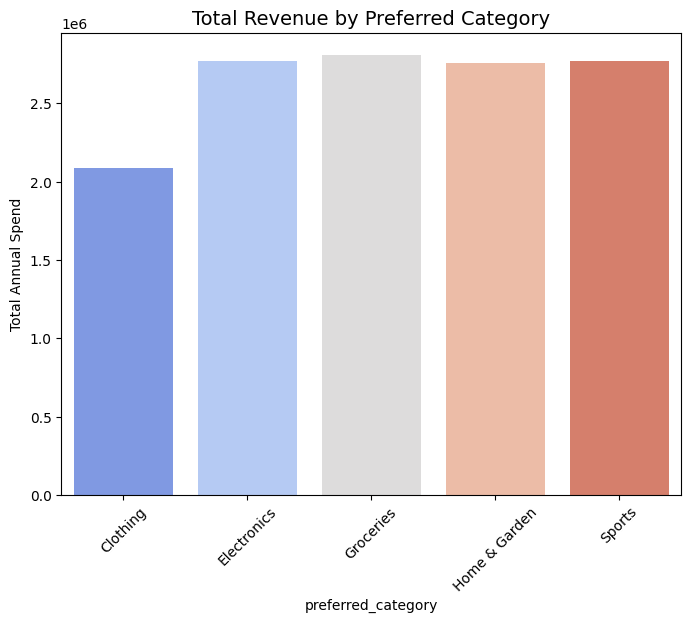

In [30]:
# Step 1: Create Annual_Spend if not already done
df["Annual_Spend"] = df["purchase_frequency"] * df["last_purchase_amount"]

# Step 2: Aggregate by preferred_category
agg_df = df.groupby("preferred_category", as_index=False)["Annual_Spend"].sum()

# Step 3: Plot with Seaborn
plt.figure(figsize=(8,6))
sns.barplot(
    data=agg_df,
    x="preferred_category",
    y="Annual_Spend",
    palette="coolwarm"   # works fine now, no hue needed
)
plt.title("Total Revenue by Preferred Category", fontsize=14)
plt.ylabel("Total Annual Spend")
plt.xticks(rotation=45)
plt.show()


**Customers Distribution By Segment**

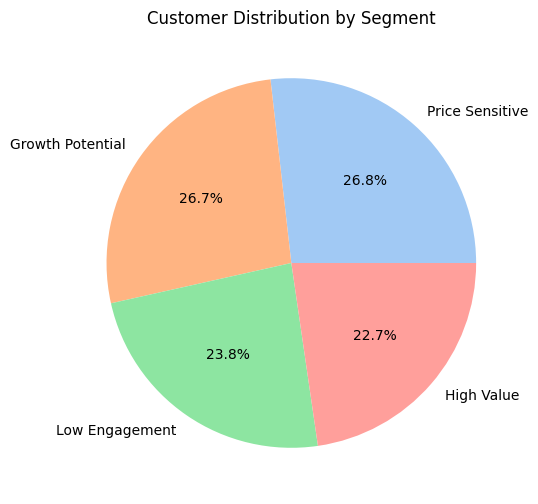

In [31]:
segment_counts = df["Segment"].value_counts()

plt.figure(figsize=(6,6))
plt.pie(segment_counts, labels=segment_counts.index, autopct="%1.1f%%", colors=sns.color_palette("pastel"))
plt.title("Customer Distribution by Segment")
plt.show()

In [32]:
# Remove $ and commas, convert to float
df["income"] = (
    df["income"]
    .replace('[\$,]', '', regex=True)  # strip $ and ,
    .astype(float)
)


<>:4: SyntaxWarning: invalid escape sequence '\$'
<>:4: SyntaxWarning: invalid escape sequence '\$'
/tmp/ipython-input-4029786481.py:4: SyntaxWarning: invalid escape sequence '\$'
  .replace('[\$,]', '', regex=True)  # strip $ and ,


In [33]:
df.head()

,id,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount,customer_lifetime_value,Segment,Annual_Spend,annual_Spend
0,1,38,Female,99342.0,90,3,24,Groceries,113.53,"$8,174.16",High Value,2724.72,2724.72
1,2,21,Female,78852.0,60,2,42,Sports,41.93,"$3,522.12",Price Sensitive,1761.06,1761.06
2,3,60,Female,126573.0,30,2,28,Clothing,424.36,"$23,764.16",Growth Potential,11882.08,11882.08
3,4,40,Other,47099.0,74,9,5,Home & Garden,991.93,"$44,636.85",Price Sensitive,4959.65,4959.65
4,5,65,Female,140621.0,21,3,25,Electronics,347.08,"$26,031.00",Growth Potential,8677.00,8677.00


**Insights & Recommendations in Python**

In [34]:
# Remove $ and commas, convert to float
df["customer_lifetime_value"] = (
    df["customer_lifetime_value"]
    .replace('[\$,]', '', regex=True)  # strip $ and ,
    .astype(float)
)


<>:4: SyntaxWarning: invalid escape sequence '\$'
<>:4: SyntaxWarning: invalid escape sequence '\$'
/tmp/ipython-input-1641857318.py:4: SyntaxWarning: invalid escape sequence '\$'
  .replace('[\$,]', '', regex=True)  # strip $ and ,


In [35]:
df.head()

,id,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount,customer_lifetime_value,Segment,Annual_Spend,annual_Spend
0,1,38,Female,99342.0,90,3,24,Groceries,113.53,8174.16,High Value,2724.72,2724.72
1,2,21,Female,78852.0,60,2,42,Sports,41.93,3522.12,Price Sensitive,1761.06,1761.06
2,3,60,Female,126573.0,30,2,28,Clothing,424.36,23764.16,Growth Potential,11882.08,11882.08
3,4,40,Other,47099.0,74,9,5,Home & Garden,991.93,44636.85,Price Sensitive,4959.65,4959.65
4,5,65,Female,140621.0,21,3,25,Electronics,347.08,26031.00,Growth Potential,8677.00,8677.00


In [36]:
import numpy as np

income_mean = df["income"].mean()
spending_mean = df["spending_score"].mean()

def classify_segment(row):
    if row["income"] > income_mean and row["spending_score"] > spending_mean:
        return "High Value"
    elif row["income"] > income_mean and row["spending_score"] <= spending_mean:
        return "Growth Potential"
    elif row["income"] <= income_mean and row["spending_score"] > spending_mean:
        return "Price Sensitive"
    else:
        return "Low Engagement"

df["Segment"] = df.apply(classify_segment, axis=1)

In [37]:
df.head()

,id,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount,customer_lifetime_value,Segment,Annual_Spend,annual_Spend
0,1,38,Female,99342.0,90,3,24,Groceries,113.53,8174.16,High Value,2724.72,2724.72
1,2,21,Female,78852.0,60,2,42,Sports,41.93,3522.12,Price Sensitive,1761.06,1761.06
2,3,60,Female,126573.0,30,2,28,Clothing,424.36,23764.16,Growth Potential,11882.08,11882.08
3,4,40,Other,47099.0,74,9,5,Home & Garden,991.93,44636.85,Price Sensitive,4959.65,4959.65
4,5,65,Female,140621.0,21,3,25,Electronics,347.08,26031.00,Growth Potential,8677.00,8677.00


**Generate basic statistics per segment**

In [42]:
segment_summary = df.groupby("Segment").agg({
    "income": "mean",
    "spending_score": "mean",
    "purchase_frequency": "mean",
    "Annual_Spend": "mean"
}).round(2)

print(segment_summary)

                     income  spending_score  purchase_frequency  Annual_Spend
Segment                                                                      
Growth Potential  117398.33           26.23               25.78      12452.34
High Value        119473.04           76.87               27.48      13620.51
Low Engagement     58338.82           24.94               26.48      13359.29
Price Sensitive    60262.80           75.74               26.76      13436.75


**Add Recommendations**

In [43]:
recommendations = {
    "High Value": "Target with loyalty programs or VIP discounts.",
    "Growth Potential": "Upsell/cross-sell to increase spending score.",
    "Price Sensitive": "Use discounts and offers.",
    "Low Engagement": "Re-engage via personalized marketing or feedback campaigns."
}

segment_summary["Recommendation"] = segment_summary.index.map(recommendations)

In [44]:
df.head()

,id,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount,customer_lifetime_value,Segment,Annual_Spend,annual_Spend
0,1,38,Female,99342.0,90,3,24,Groceries,113.53,8174.16,High Value,2724.72,2724.72
1,2,21,Female,78852.0,60,2,42,Sports,41.93,3522.12,Price Sensitive,1761.06,1761.06
2,3,60,Female,126573.0,30,2,28,Clothing,424.36,23764.16,Growth Potential,11882.08,11882.08
3,4,40,Other,47099.0,74,9,5,Home & Garden,991.93,44636.85,Price Sensitive,4959.65,4959.65
4,5,65,Female,140621.0,21,3,25,Electronics,347.08,26031.00,Growth Potential,8677.00,8677.00


**Display final insights**

In [41]:
import pandas as pd
import IPython.display as display

display.display(segment_summary)

,income,spending_score,purchase_frequency,Annual_Spend,Recommendation
Segment,,,,,
Growth Potential,117398.33,26.23,25.78,12452.34,Upsell/cross-sell to increase spending score.
High Value,119473.04,76.87,27.48,13620.51,Target with loyalty programs or VIP discounts.
Low Engagement,58338.82,24.94,26.48,13359.29,Re-engage via personalized marketing or feedba...
Price Sensitive,60262.80,75.74,26.76,13436.75,Use discounts and offers.
